<a href="https://colab.research.google.com/github/zinengtang/TVLT/blob/main/Demo_Emotional_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TVLT Emotional Analysis

This notebook demonstrates how to use TVLT for Emotional Analysis on Video-Audio inputs and on Video-Text inputs. (MOSEI dataset)

Download code and install dependencies

In [1]:
# public repo
# !git clone https://github.com/zinengtang/TVLT

# private repo: upload the code as zip
# !rm -rf TVLT-main
!unzip -q TVLT-main.zip

In [2]:
cd /content/TVLT-main

/content/TVLT-main


In [3]:
pwd

'/content/TVLT-main'

In [5]:
!pip install -q torch==1.10.0 torchvision==0.11.1 torchaudio==0.10.0 torchtext
!pip install -q -r requirements.txt
!pip install -q imageio==2.4.1

     |████████████████████████████████| 585 kB 4.9 MB/s 
     |████████████████████████████████| 4.4 MB 66.6 MB/s 
     |████████████████████████████████| 376 kB 73.0 MB/s 
     |████████████████████████████████| 13.6 MB 57.2 MB/s 
     |████████████████████████████████| 214 kB 70.9 MB/s 
     |████████████████████████████████| 177 kB 53.9 MB/s 
     |████████████████████████████████| 952 kB 55.0 MB/s 
     |████████████████████████████████| 419 kB 74.5 MB/s 
     |████████████████████████████████| 6.6 MB 56.8 MB/s 
     |████████████████████████████████| 163 kB 65.4 MB/s 
     |████████████████████████████████| 1.5 MB 53.0 MB/s 
     |████████████████████████████████| 66 kB 4.7 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


### Load model for emotional analysis

In [6]:
from demos import MOSEI_emotion_model, MOSEI_emotion_model_text

model = MOSEI_emotion_model()
model_text = MOSEI_emotion_model_text()

# Be default, the model weight will be automatically downloaded into ~/.cache/huggingface/hub/models--TVLT--models/blobs
# The symbol link of the model will be in ~/.cache/huggingface/hub/models--TVLT--models/snapshots/5f9684296bcd0389ce6af252487f8b82e9170f2b/[the_checkpoint_symbol_link] -> ../../blobs/[the_actual_model_file]
# This is automatically handled by huggingface hub.

Downloading:   0%|          | 0.00/355M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/444M [00:00<?, ?B/s]

In [7]:
device = 'cuda'
# device  = 'cpu'

model.to(device)
model_text.to(device)

model.eval();
model_text.eval();

### Load sample data

In [8]:
from model.data.datasets.rawvideo_utils import load_audio, load_video, load_video_audio, load_text

video_path = 'demo_samples/MOSEI/K0m1tO3Ybyc_2.mp4' # You can specify your own video file here
audio_path = 'demo_samples/MOSEI/K0m1tO3Ybyc_2.wav' # You can specify your own audio file here
video = load_video(video_path, num_frames=8)
audio = load_audio(audio_path, sr=44100)

text_path = 'demo_samples/MOSEI/K0m1tO3Ybyc_2.txt' # You can specify your own text file here
text, text_ids, text_masks = load_text(text_path)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)581632/45929032 bytes (1.3%)1179648/45929032 bytes (2.6%)1974272/45929032 bytes (4.3%)5316608/45929032 bytes (11.6%)9150464/45929032 bytes (19.9%)13008896/45929032 bytes (28.3%)17039360/45929032 bytes (37.1%)19685376/45929032 bytes (42.9%)19750912/45929032 bytes (43.0%)19816448/45929032 bytes (43.1%)19881984/45929032 bytes (43.3%)19931136/45929032 bytes (43.4%)19996672/

  "Argument interpolation should be of type InterpolationMode instead of int. "



Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Inference

In [9]:
video = video.to(device)
audio = audio.to(device)
text_ids = text_ids.to(device)
text_masks = text_masks.to(device)

In [10]:
import numpy as np
import torch

with torch.no_grad():
  encoder_last_hidden_outputs, *_ = model(video=video, audio=audio)
  s = model.classifier(encoder_last_hidden_outputs).squeeze().data.cpu().numpy()
  s = np.round(s, 3)

  encoder_last_hidden_outputs_text_based, *_ = model_text(video=video, text_ids=text_ids, text_masks=text_masks)
  s_t = model.classifier(encoder_last_hidden_outputs_text_based).squeeze().data.cpu().numpy()
  s_t = np.round(s_t, 3)

--------------------------
emotion intensity, by TVLT video-audio model
Happy 0.722 Sad -0.655 Angry 0.658 Fear 0.077 Disgust 0.747 Surprise -0.693
--------------------------
emotion intensity, by TVLT video-text model
Happy 0.789 Sad 0.246 Angry 0.613 Fear 0.177 Disgust -1.439 Surprise -0.884
--------------------------

Sample Display


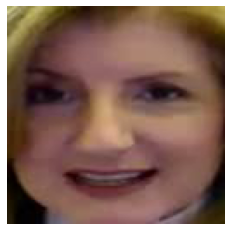

"Remember when we read about Marie Antoinette we used to talk of love."


In [11]:
import matplotlib.pyplot as plt
from model.data.datasets.rawvideo_utils import load_video_raw

print('--------------------------')
print('emotion intensity, by TVLT video-audio model')
print(f'Happy {str(s[0])} Sad {str(s[1])} Angry {str(s[2])} Fear {str(s[3])} Disgust {str(s[4])} Surprise {str(s[5])}')
print('--------------------------')
print('emotion intensity, by TVLT video-text model')
print(f'Happy {str(s_t[0])} Sad {str(s_t[1])} Angry {str(s_t[2])} Fear {str(s_t[3])} Disgust {str(s_t[4])} Surprise {str(s_t[5])}')

print('--------------------------')
print()
print('Sample Display')
plt.axis('off')
plt.imshow(load_video_raw(video_path, 3)[0])
plt.show()

print(f'"{text}"')

import IPython

IPython.display.Audio(audio_path)

### Note on shape of the tensor (Video-Audio Model)

* Dimension of input video tensor: (batch_size, number_of_frames, rgb_channel, width, height)  
* Dimension of input audio tensor: (batch_size, number_of_audio_channels, time, spectrogram)

See the actual size of the tensor below.

In [12]:
print(video.size())   # 1, 8, 3, 224, 224
print(audio.size())   # 1, 1, 432, 128

torch.Size([1, 8, 3, 224, 224])
torch.Size([1, 1, 432, 128])


We encoder the input video and audio using the transformer.

See the size of the hidden outputs below.

In [13]:
with torch.no_grad():
  encoder_last_hidden_outputs, *_ = model(video=video, audio=audio)
print(encoder_last_hidden_outputs.size())

torch.Size([1, 1785, 768])


We can see that we got a total number of **1785** features with dimension size being 768 (the hidden output size of TVLT encoder).

**How is 1785 added up?**

We split the input video frames into $16 \times 16$-sized patches and split input audio spectrogram into $16 \times 16$-sized patches.  

Given that we have $8$ frames of $224 \times 224$-images and the audio spectrogram is $432 \times 128$, we will have $8 \times \frac{224}{16} \times \frac{224}{16} = 1568$ video patches and $\frac{432}{16} \times \frac{128}{16} = 216 $ audio patches.

We apply transformer on each patch and then append a $[CLS]$ token at the beginning. That gives us a total number of $1 + 1568 + 216 = 1785$ features.

Finally, we apply MLP head on the first $[CLS]$ token. See the code below.

In [14]:
with torch.no_grad():
  emotional_score = model.classifier(encoder_last_hidden_outputs)
print(emotional_score)  # print the output score for Happy, Sad, Angry, Fear, Disgust, Surprise

tensor([[ 0.7224, -0.6551,  0.6578,  0.0768,  0.7466, -0.6933]],
       device='cuda:0')


### Note on shape of the tensor (Video-Text Model)

* Dimension of input video tensor: (batch_size, number_of_frames, rgb_channel, width, height)  
* Dimension of input audio tensor: (batch_size, number_of_tokens)

See the actual size of the tensor below.

In [15]:
print(video.size())   # 1, 8, 3, 224, 224
print(text_ids.size())   # 1, 1, 432, 128

torch.Size([1, 8, 3, 224, 224])
torch.Size([1, 40])


We encoder the input video and audio using the transformer.

See the size of the hidden outputs below.

In [16]:
with torch.no_grad():
  encoder_last_hidden_outputs_text_based, *_ = model_text(video=video, text_ids=text_ids, text_masks=text_masks)
print(encoder_last_hidden_outputs_text_based.size())

torch.Size([1, 1609, 768])


We can see that we got a total number of **1609** features with dimension size being 768 (the hidden output size of TVLT encoder).

**How is 1609 added up?**

Again, we split the input video frames into $16 \times 16$-sized patches.

We have $8$ frames of $224 \times 224$-images from video input and we have 40 tokens from text input. 
We will have $8 \times \frac{224}{16} \times \frac{224}{16} = 1568$ video patches and $40$ text tokens.

We apply transformer on each patch and token and then append a $[CLS]$ token at the beginning. That gives us a total number of $1 + 1568 + 40 = 1609$ features.

Finally, we apply MLP head on the first $[CLS]$ token. See the code below.

In [17]:
with torch.no_grad():
  emotional_score_t = model.classifier(encoder_last_hidden_outputs_text_based)
print(emotional_score_t)  # print the output score for Happy, Sad, Angry, Fear, Disgust, Surprise

tensor([[ 0.7892,  0.2465,  0.6133,  0.1766, -1.4388, -0.8844]],
       device='cuda:0')
